In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, precision_score, recall_score, precision_recall_curve, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer

In [7]:
cancer = load_breast_cancer()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=0)

In [11]:
rf_clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

In [15]:
fpr, tpr, thres = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])

In [25]:
close_zero = np.argmin(np.abs(thres - 0.5))

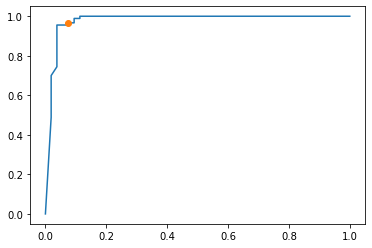

In [26]:
plt.plot(fpr, tpr)
plt.plot(fpr[close_zero], tpr[close_zero], marker='o')

In [31]:
roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1]), precision_score(y_test, rf_clf.predict(X_test)), recall_score(y_test, rf_clf.predict(X_test))

(0.9779874213836478, 0.9555555555555556, 0.9555555555555556)